In [1]:
import os
import numpy as np
import pandas as pd
import readdat as rd


In [3]:
# すべての.datファイルについて展の数を確認する
# ここでは、データの形状を確認するためにprint文を使用しています。

data_dir = "UIUC Database"
file_list = [f for f in os.listdir(data_dir) if f.endswith(".dat")]

for i, file in enumerate(file_list):
    data = data_dir + "/" + file
    print(f"Processing file {i + 1}/{len(file_list)}: {file}")
    read_airfoil_data = rd.read_airfoil(data)
    print(f"Data shape for {file}: {read_airfoil_data.shape}")
    print("\n")

    # 処理できないファイルがある場合はスキップし処理を続ける
    # 処理できないファイルはファイル名をスキップリストに追加
    if read_airfoil_data.shape[0] == 0:
        print(f"Skipping file {file} due to no data points.")
        continue


Processing file 1/1637: 2032c.dat


AttributeError: 'list' object has no attribute 'strip'

In [7]:
import ResampleUIUC as resmpl
folder = "UIUC Database"  # UIUCのdatフォルダ
dataset, names, labels = resmpl.process_uiuc_folder(folder, n_points=200)

Saved (1637, 200, 2) to airfoils_resampled.npy
Saved (1637,) to airfoils_labels.npy


In [5]:
# airfoils_resampled.npy の中身を可視化
import matplotlib.pyplot as plt

airfoildata = np.load("airfoils_resampled.npy")
print(airfoildata.shape)
print(airfoildata[0])


(1637, 200, 2)
[[ 1.00000000e+00  1.60000000e-03]
 [ 9.89948862e-01  3.77104575e-03]
 [ 9.79897725e-01  5.94209150e-03]
 [ 9.69846587e-01  8.11313724e-03]
 [ 9.59795449e-01  1.02841830e-02]
 [ 9.49743999e-01  1.24537603e-02]
 [ 9.39680566e-01  1.45670812e-02]
 [ 9.29617133e-01  1.66804022e-02]
 [ 9.19553700e-01  1.87937231e-02]
 [ 9.09490267e-01  2.09070440e-02]
 [ 8.99425595e-01  2.30143066e-02]
 [ 8.89340410e-01  2.50212584e-02]
 [ 8.79255225e-01  2.70282102e-02]
 [ 8.69170040e-01  2.90351620e-02]
 [ 8.59084855e-01  3.10421138e-02]
 [ 8.48999670e-01  3.30490656e-02]
 [ 8.38914486e-01  3.50560174e-02]
 [ 8.28829301e-01  3.70629692e-02]
 [ 8.18744116e-01  3.90699209e-02]
 [ 8.08658931e-01  4.10768727e-02]
 [ 7.98569282e-01  4.30603906e-02]
 [ 7.88452533e-01  4.49016390e-02]
 [ 7.78335784e-01  4.67428873e-02]
 [ 7.68219035e-01  4.85841357e-02]
 [ 7.58102286e-01  5.04253840e-02]
 [ 7.47985536e-01  5.22666324e-02]
 [ 7.37868787e-01  5.41078807e-02]
 [ 7.27752038e-01  5.59491291e-02]
 [ 7.

In [6]:
# airfoils_labels.npy の中身を可視化
import matplotlib.pyplot as plt

airfoil_labels = np.load("airfoils_labels.npy")
print(airfoil_labels.shape)
print(airfoil_labels[:30])

(1637,)
['Unknown' 'Unknown' 'Unknown' 'Unknown' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG'
 ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG' ' Drela AG']


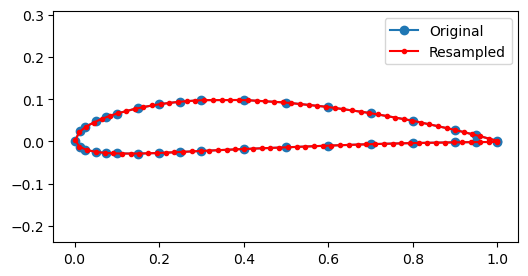

In [4]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "naca4412.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=100)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


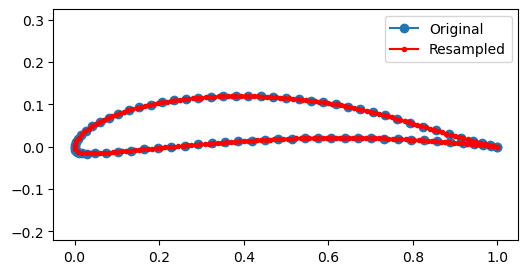

In [5]:
data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)

plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled[:,0], coords_resampled[:,1], 'r.-', label='Resampled')
plt.axis('equal')
plt.legend()
plt.show()


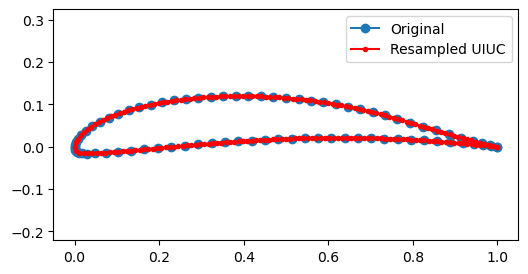

In [6]:
import ResampleUIUC as resmpl
import matplotlib.pyplot as plt

data_dir = "UIUC Database"
filename = "DAE31.dat"
data = data_dir + "/" + filename

coords = resmpl.load_airfoil_dat(data)
coords_resampled = resmpl.normalize_and_resample(coords, n_points=200)
coords_resampled_uiuc = resmpl.normalize_and_resample_uiuc(coords, n_points=200)


plt.figure(figsize=(6,3))
plt.plot(coords[:,0], coords[:,1], 'o-', label='Original')
plt.plot(coords_resampled_uiuc[:,0], coords_resampled_uiuc[:,1], 'r.-', label='Resampled UIUC')
plt.axis('equal')
plt.legend()
plt.show()                                  


補間点数は200あれば十分

In [5]:
import ResampleUIUC as resmpl
# ラベル抽出のテスト
label = resmpl.get_airfoil_label("naca4412.dat")
print(label)  # "NACA"

NACA


In [13]:

maker_list = ["NACA", "DAE", "e", "UIUC", "Boeing", "NASA", "mel", "Boeing-UIUC", "Boeing-NASA","ME"]

# ラベル抽出のテスト
for maker in maker_list:
    filename = f"{maker.lower()}_airfoil.dat"
    label = resmpl.get_airfoil_label(filename)
    print(f"Filename: {filename}, Extracted Label: {label}")

Filename: naca_airfoil.dat, Extracted Label: NACA
Filename: dae_airfoil.dat, Extracted Label: Unknown
Filename: e_airfoil.dat, Extracted Label: Eppler
Filename: uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing_airfoil.dat, Extracted Label: Unknown
Filename: nasa_airfoil.dat, Extracted Label: Unknown
Filename: mel_airfoil.dat, Extracted Label: Unknown
Filename: boeing-uiuc_airfoil.dat, Extracted Label: Unknown
Filename: boeing-nasa_airfoil.dat, Extracted Label: Unknown
Filename: me_airfoil.dat, Extracted Label: Unknown


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 200, 2)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 200, 32)   │        352 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 100, 32)   │          0 │ conv1d_6[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 100, 64)   │     10,304 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 50, 64)    │          0 │ conv1d_7[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 50, 128)   │     24,704 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 6400)      │          0 │ conv1d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    819,328 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 855,204 (3.26 MB)

 Trainable params: 855,204 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6400)           │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 50, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_2 (UpSampling1D)  │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 100, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_3 (UpSampling1D)  │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 200, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Conv1D)         │ (None, 200, 2)         │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,842 (468.13 KB)

 Trainable params: 119,842 (468.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - kl_loss: 4.1518 - loss: 52.5486 - reconstruction_loss: 48.3968
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 2.4520 - loss: 23.3227 - reconstruction_loss: 20.8706
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - kl_loss: 2.0523 - loss: 22.6748 - reconstruction_loss: 20.6225
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - kl_loss: 2.1194 - loss: 20.2364 - reconstruction_loss: 18.1170
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 3.2854 - loss: 8.6731 - reconstruction_loss: 5.3878
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 3.0979 - loss: 7.5344 - reconstruction_loss: 4.4365
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 3.0209 - loss: 7.7845 - reconstruction_loss: 4.7636
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - kl_loss: 3.0718 - loss: 6.9219 - reconstruction_loss: 3.8501
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - kl_loss: 3.3265 - loss: 44.

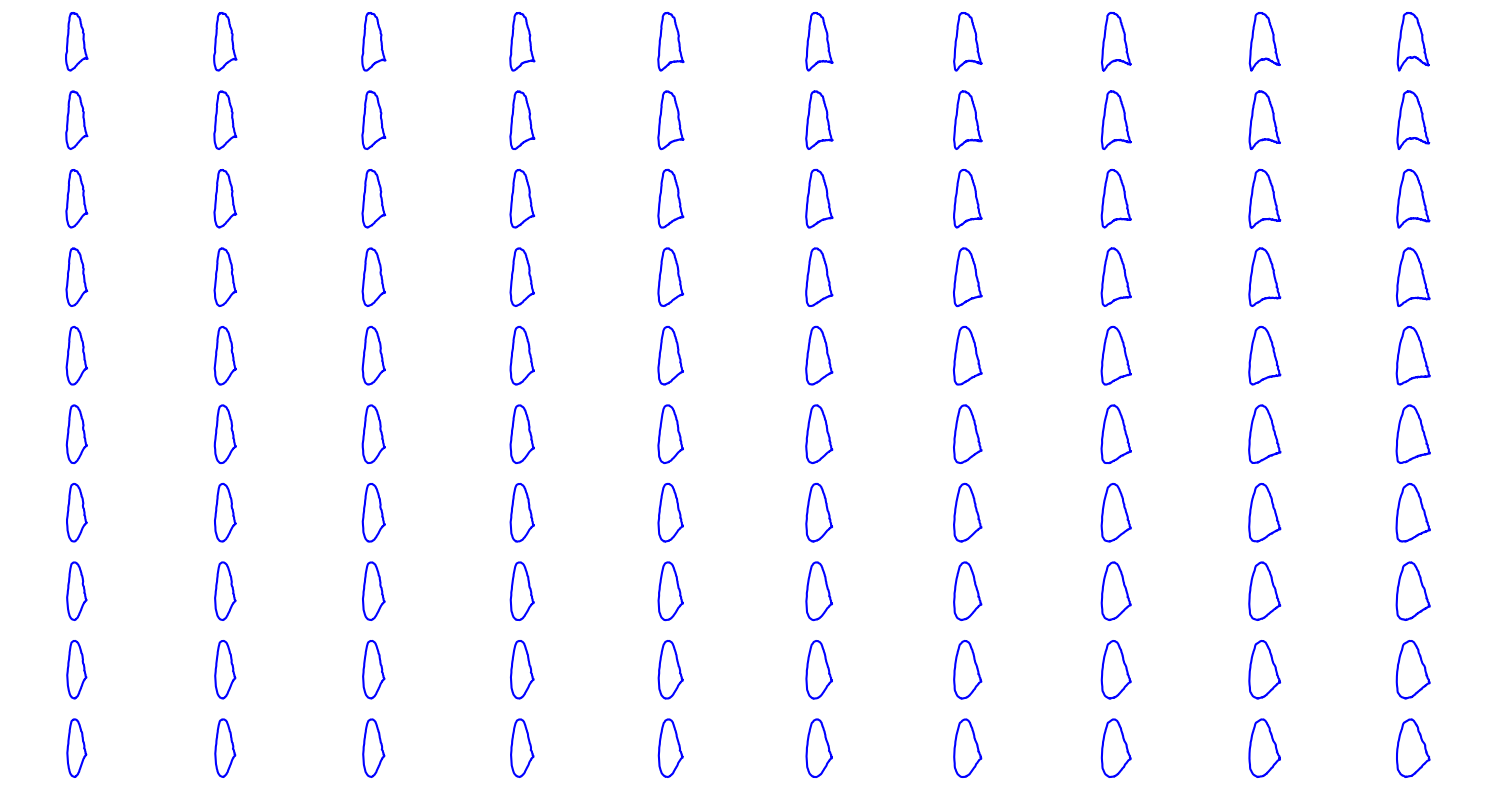

'\n「潜在空間の可視化（クラスタリングプロット）用に、airfoilとラベルを準備」\n'

In [15]:
"""
Title: Airfoil AutoEncoder
Author: tnkm23
Date created: 2025/08/12
Last modified: 2025/08/12
Description: Convolutional Variational AutoEncoder (VAE) trained on Airfoil shapes.
Accelerator: CPU

VAE
 入力：Airfoil形状データ
 出力：Airfoil形状データの再構成

"""
"""
## Setup
"""

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers


# -----------------------
# ハイパーパラメータ
# -----------------------
DATA_PATH = "airfoils_resampled.npy"
LABEL_PATH = "airfoils_labels.npy"
MODEL_DIR = "vae_models"
BATCH_SIZE = 32
EPOCHS = 30
LATENT_DIM = 2         # 潜在次元（調整する）
N_POINTS = 200
N_CHANNELS = 2         # x,y
LEARNING_RATE = 1e-3


"""
## Create a sampling layer
"""


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z"""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        """
        reparametrization trick（再パラメータ化トリック）
        ガウシアン分布からサンプリングするためのトリック。
        z_meanとz_log_varを使って、zをサンプリングする。
        サンプリング操作を微分可能にし、VAEの学習を可能にしています。
        潜在空間の分布から「z」を生成。
        """
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon


"""
## Build the encoder
"""
encoder_inputs = keras.Input(shape=(N_POINTS, N_CHANNELS), name="encoder_input")
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(encoder_inputs)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 200 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.MaxPooling1D(pool_size=2, padding="same")(x)   # 100 -> 50
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(LATENT_DIM, name="z_mean")(x)
z_log_var = layers.Dense(LATENT_DIM, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


"""
## Build the decoder
"""
latent_inputs = keras.Input(shape=(LATENT_DIM,), name="z_sampling")
x = layers.Dense(50 * 128, activation="relu")(latent_inputs)
x = layers.Reshape((50, 128))(x)  # match encoder downsampled length
x = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 50 -> 100
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.UpSampling1D(size=2)(x)   # 100 -> 200
x = layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
decoded_outputs = layers.Conv1D(N_CHANNELS, kernel_size=1, padding="same", activation=None, name="decoder_output")(x)
decoder = keras.Model(latent_inputs, decoded_outputs, name="decoder")
decoder.summary()


"""
## Define the VAE as a `Model` with a custom `train_step`
"""

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        """
        1. エンコーダを通してデータを潜在変数に変換
        2. デコーダを通して再構成データを生成
        3. 再構成損失とKL損失（正則化項）を計算
        4. 勾配を計算し、モデルを更新
        z_mean：潜在変数の平均 myu
        z_log_var：潜在変数の対数分散 log(var(z)) log(sigma^2)
        var_z：潜在変数の分散 var(z) sigma^2
        z：潜在変数
     """
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            
            # デコーダを通して再構成データを生成
            reconstruction = self.decoder(z)

            # 再構成損失        
            reconstruction_loss = ops.mean(
                ops.sum(
                    ops.square(data - reconstruction),
                    axis=1  # (batch, 200, 2) → sum over points/channels
                )
            )

            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var)) # KLダイバージェンス
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss # VAEの総損失

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE

- airfoils_resampled.npyを読み込み。airfoilデータは(1640,200,2)のndarray
- yチャネルのスケール正規化（必要なら）
- VAEモデルを作成・コンパイルし、全データで学習
"""

# Airfoilデータの読み込み
airfoil_data = np.load("airfoils_resampled.npy").astype("float32")  # shape: (1637, 200, 2)

# 必要ならyチャンネルのスケール調整
y_std = np.std(airfoil_data[:,:,1])
if y_std > 0:
    airfoil_data[:,:,1] = airfoil_data[:,:,1] / y_std

# VAEモデルの作成・コンパイル
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# 学習
vae.fit(airfoil_data, epochs=EPOCHS, batch_size=BATCH_SIZE)

"""
## Display a grid of sampled airfoil
"""

import matplotlib.pyplot as plt

def plot_latent_space_airfoil(vae, n=10, figsize=(15, 8)):
    scale = 1.0
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    fig, axes = plt.subplots(n, n, figsize=figsize)
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            coords_decoded = vae.decoder.predict(z_sample, verbose=0)[0]  # shape: (200, 2)
            ax = axes[i, j]
            ax.plot(coords_decoded[:,0], coords_decoded[:,1], 'b-')
            ax.axis('equal')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_latent_space_airfoil(vae)

"""
## Display how the latent space clusters different airfoil classes
"""


def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the airfoil latent space, colored by data index (gradient)
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    idx = np.arange(len(z_mean))
    unique_labels = np.unique(labels)
    label_colors = plt.cm.get_cmap('viridis', len(unique_labels))
    color_map = {label: label_colors(i) for i, label in enumerate(unique_labels)}
    
    plt.figure(figsize=(12, 10))
    # scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=idx, cmap='viridis')
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter, label='Data Index')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering (Index Gradient)")
    plt.show()

"""
「潜在空間の可視化（クラスタリングプロット）用に、airfoilとラベルを準備」
"""

# airfoil_data = np.load("airfoils_resampled.npy")
# airfoil_labels = np.load("airfoils_labels.npy")
# plot_label_clusters(vae, airfoil_data, airfoil_labels)


In [20]:
from sklearn.preprocessing import LabelEncoder

def plot_label_clusters(vae, data, labels):
    z_mean, _, _ = vae.encoder.predict(data, verbose=0)
    unique_labels = np.unique(labels)
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
    plt.figure(figsize=(12, 10))
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)[0]
        plt.scatter(z_mean[idx, 0], z_mean[idx, 1],
                    color=colors[i], label=label, alpha=0.7, edgecolors='none')
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Latent Space Clustering by Label")
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

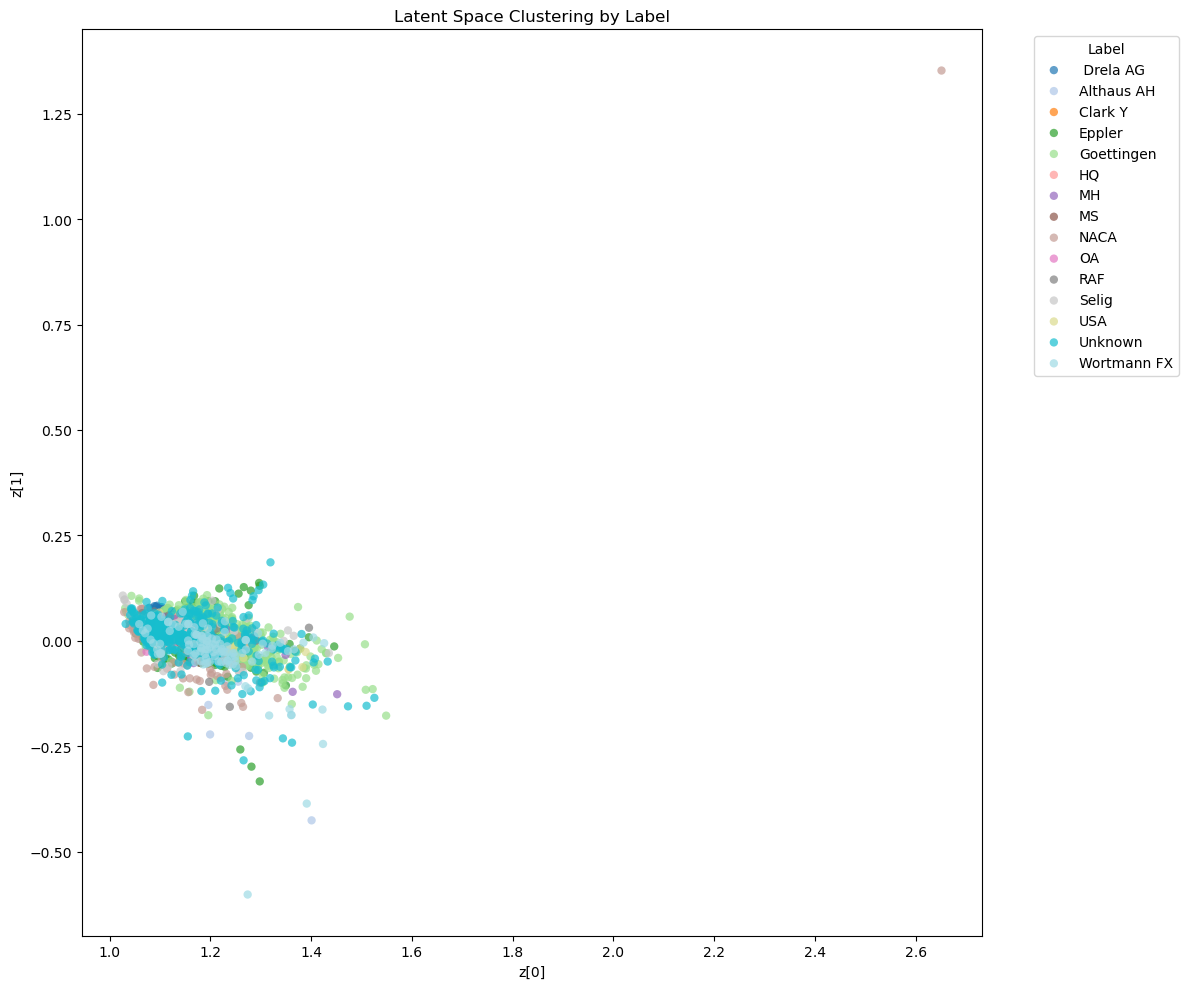

In [21]:
airfoil_data = np.load("airfoils_resampled.npy")
airfoil_labels = np.load("airfoils_labels.npy")
plot_label_clusters(vae, airfoil_data, airfoil_labels)

In [ ]:
"""
zmean をlabelsの値ごとにリストに分け、plt.scatterで描画する
それぞれの凡例はlabelsの値に対応する色で表示される
それぞれのクラスタを表示、非表示がコメントアウトで切り替えられるようにし、
各クラスタの分布を確認する
"""







In [33]:
import numpy as np
import matplotlib.pyplot as plt

airfoil_data = np.load("airfoils_resampled.npy")
airfoil_labels = np.load("airfoils_labels.npy")
unique_labels = np.unique(airfoil_labels)
z_mean, _, _ = vae.encoder.predict(airfoil_data, verbose=0)

# z_mean を labels の値ごとにリストに分ける
clusters = {label: [] for label in unique_labels}
for i in range(len(airfoil_labels)):
    clusters[airfoil_labels[i]].append(z_mean[i])

clusters.keys()  # クラスタのキーを確認


dict_keys([' Drela AG', 'Althaus AH', 'Clark Y', 'Eppler', 'Goettingen', 'HQ', 'MH', 'MS', 'NACA', 'OA', 'RAF', 'Selig', 'USA', 'Unknown', 'Wortmann FX'])

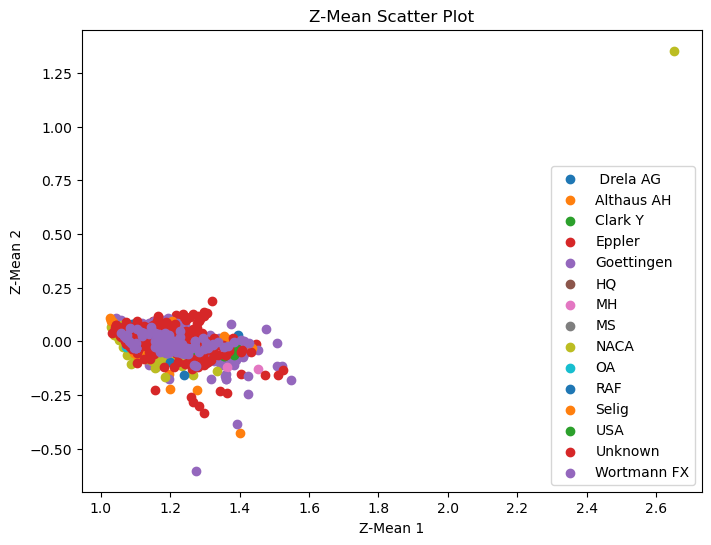

In [34]:
# 各クラスタの散布図を描画
plt.figure(figsize=(8, 6))
for cluster, points in clusters.items():
    if points:  # クラスタにポイントがある場合のみ描画
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f'{cluster}')
plt.xlabel('Z-Mean 1')
plt.ylabel('Z-Mean 2')
plt.title('Z-Mean Scatter Plot')
plt.legend()
plt.show()

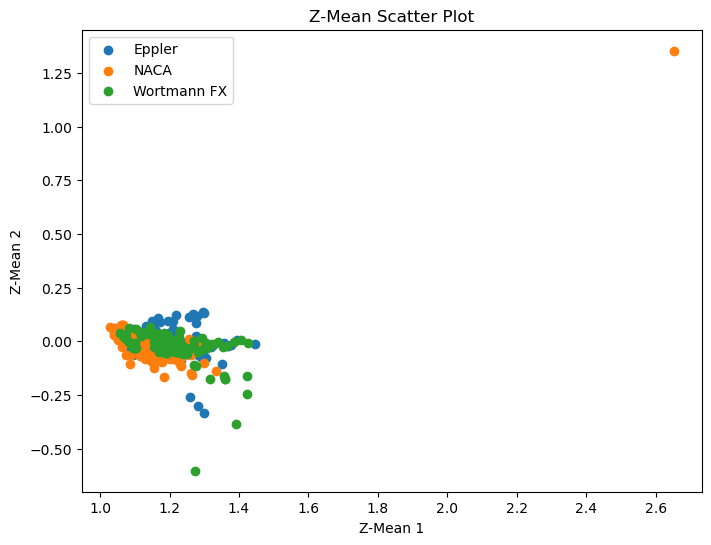

In [56]:
# 各クラスタの散布図を描画
# 描画するクラスタだけ、リストで指定
clusters_to_plot = [
                    # ' Drela AG', 
                    # 'Althaus AH',
                    # 'Clark Y',
                    'Eppler',
                    # 'Goettingen',
                    # 'HQ',
                    # 'MH',
                    # 'MS',
                    'NACA',
                    # 'OA',
                    # 'RAF',
                    # 'Selig',
                    # 'USA',
                    # 'Unknown',
                    'Wortmann FX'
                    ]


# clusters_to_plotを描画
plt.figure(figsize=(8, 6))
for cluster in clusters_to_plot:
    points = clusters.get(cluster, [])
    if points:  # クラスタにポイントがある場合のみ描画
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], label=f'{cluster}')


plt.xlabel('Z-Mean 1')
plt.ylabel('Z-Mean 2')
plt.title('Z-Mean Scatter Plot')
plt.legend()
plt.show()